In [5]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [6]:
# Import 'TSLA.csv' (Tesla Stock Prices from 7/19/2016 - 7/19/2019)

df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100
1,2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500
2,2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700
3,2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700
4,2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700


In [7]:
# Check df datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
Date         755 non-null object
Open         755 non-null float64
High         755 non-null float64
Low          755 non-null float64
Close        755 non-null float64
Adj Close    755 non-null float64
Volume       755 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [8]:
# Change date column into datetime stamp

df.Date = pd.to_datetime(df.Date)

In [9]:
# Create column to view the percent change in open prices

df['daily_open_percent_change'] = df.Open.pct_change() * 100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_open_percent_change
0,2016-07-19,225.000000,229.100006,224.750000,225.259995,225.259995,3115100,NaN
1,2016-07-20,226.470001,229.800003,225.000000,228.360001,228.360001,2568500,0.653334
2,2016-07-21,226.000000,227.850006,219.100006,220.500000,220.500000,4428700,-0.207533
3,2016-07-22,221.990005,224.500000,218.880005,222.270004,222.270004,2579700,-1.774334
4,2016-07-25,222.270004,231.389999,221.369995,230.009995,230.009995,4490700,0.126131


In [10]:
# Check shape of df

df.shape

(755, 8)

In [11]:
# Check for nan values in df

df.isna().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Adj Close                    0
Volume                       0
daily_open_percent_change    1
dtype: int64

In [12]:
# Drop nan values from df and check length

df = df.dropna()
len(df)

754

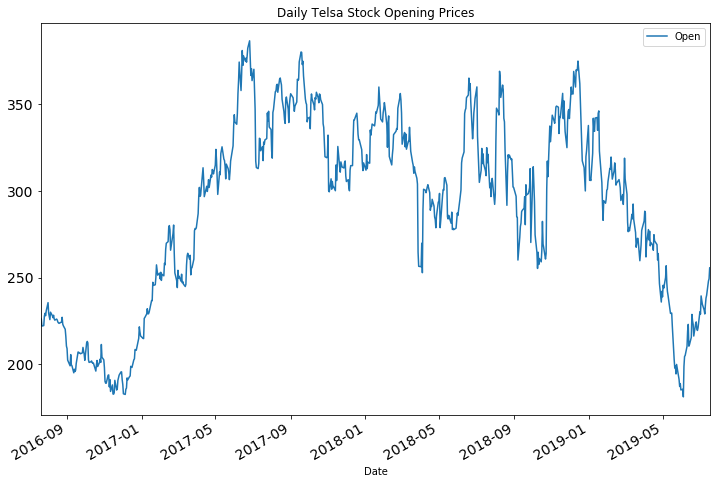

In [13]:
# Plot Open Price

df.plot(x='Date', y='Open', figsize=(12,8), title = 'Daily Telsa Stock Opening Prices', fontsize=14)

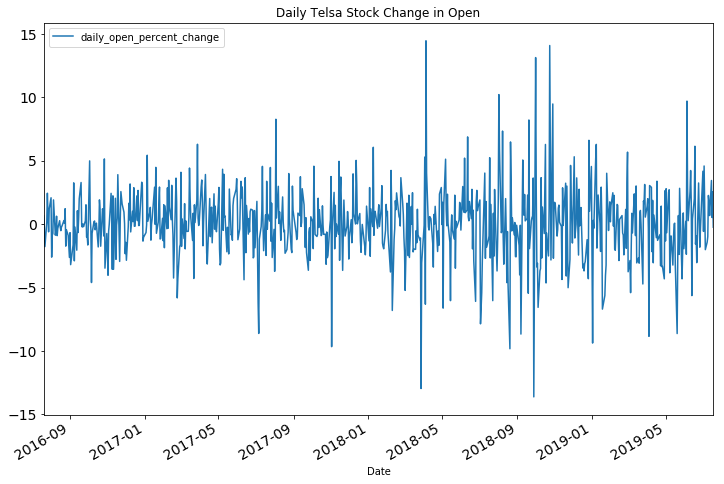

In [14]:
# Plot Open Percent Change

df.plot(x='Date', y='daily_open_percent_change', figsize=(12,8), title = 'Daily Telsa Stock Change in Open', fontsize=14)

In [15]:
# Min open percent change

min(df.daily_open_percent_change)

-13.627352130917581

In [16]:
# MAx open percent change

max(df.daily_open_percent_change)

14.463168424967021

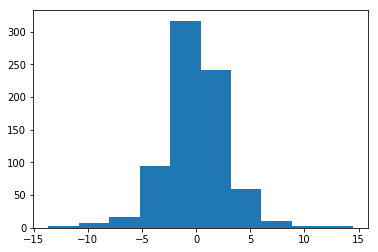

In [17]:
# Distribution of open percent changes

df.daily_open_percent_change.hist(grid=False);

In [18]:
np.mean(df.daily_open_percent_change)

0.05793261863754506

In [19]:
np.std(df.daily_open_percent_change)

2.8739060485202104

In [20]:
#jan_19_series = monthly_open_percent_change['01-2019']
#feb_19_series = monthly_open_percent_change['02-2019']
#print(np.mean(aug_series), np.std(aug_series))
#print(np.mean(oct_series), np.std(oct_series))

In [21]:
monthly_avg = df.resample('M', on='Date').mean()
monthly_avg = monthly_avg.reset_index()
monthly_avg['monthly_open_percent_change'] = monthly_avg.Open.pct_change() * 100
monthly_avg = monthly_avg.dropna()
monthly_avg.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_open_percent_change,monthly_open_percent_change
1,2016-08-31,224.923914,226.659131,222.029130,223.734347,223.734347,2.706635e+06,-0.392253,-0.718308
2,2016-09-30,203.014286,205.382856,199.996191,202.256191,202.256191,3.362929e+06,-0.175419,-9.740906
3,2016-10-31,202.982859,204.888096,199.502858,201.683334,201.683334,4.386100e+06,0.030530,-0.015480
4,2016-11-30,189.541903,192.548096,186.103334,189.157619,189.157619,4.707105e+06,-0.251953,-6.621720
5,2016-12-31,199.567620,202.977142,197.564284,200.552856,200.552856,4.188552e+06,0.608443,5.289446


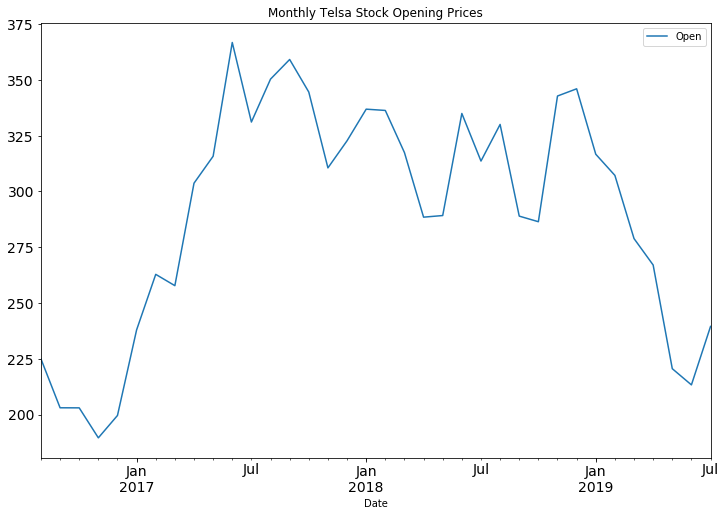

In [22]:
monthly_avg.plot(x='Date', y='Open', figsize=(12,8), title= 'Monthly Telsa Stock Opening Prices', fontsize=14)

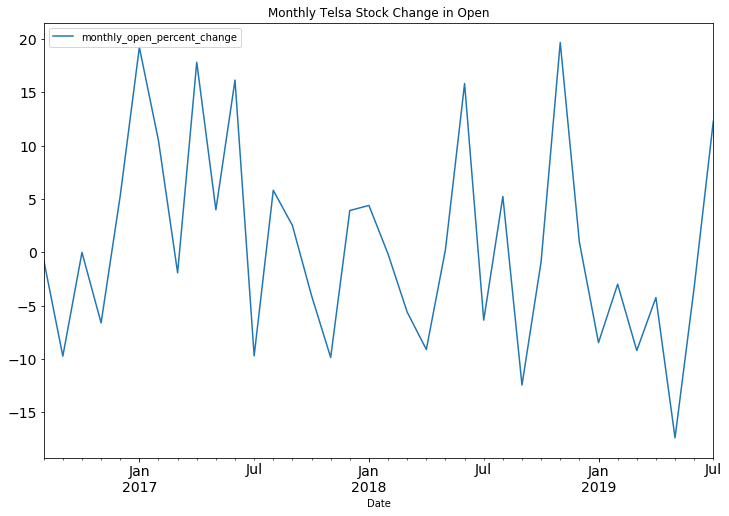

In [23]:
monthly_avg.plot(x='Date', y='monthly_open_percent_change', figsize=(12,8), title= 'Monthly Telsa Stock Change in Open', fontsize=14)

<Figure size 432x288 with 0 Axes>

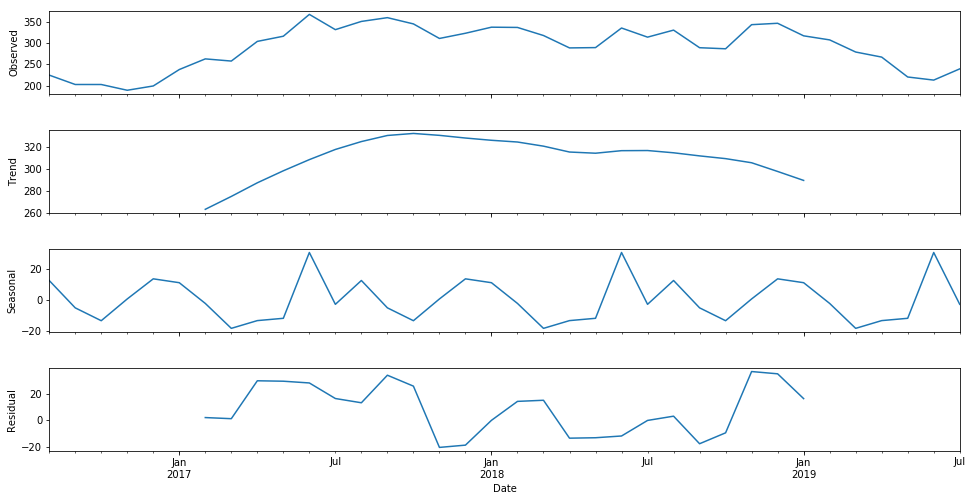

In [24]:
# View monthly open components

monthly_open = monthly_avg[['Date','Open']].set_index('Date')
monthly_open_decomposition = seasonal_decompose(monthly_open, freq=12)
fig = plt.figure()
fig = monthly_open_decomposition.plot()
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

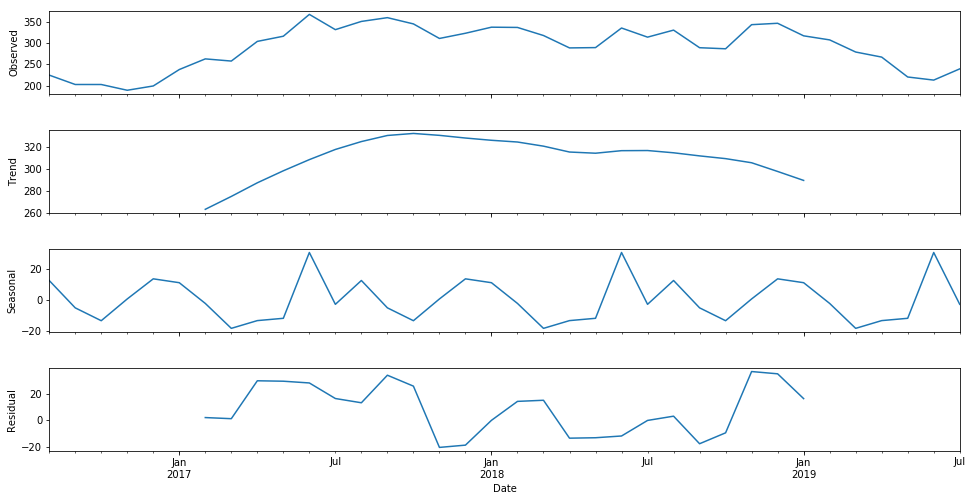

In [25]:
# View monthly open percent change components

monthly_open_percent_change = monthly_avg[['Date','monthly_open_percent_change']].set_index('Date')
monthly_open_percent_change_decomposition = seasonal_decompose(monthly_open, freq=12)
fig = plt.figure()
fig = monthly_open_percent_change_decomposition.plot()
fig.set_size_inches(15, 8)

In [26]:
# Create function to check if times series is stationary

def stationary_test(timeseries, window):
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    fig = plt.figure(figsize=(12,8))
    orig = plt.plot(timeseries.iloc[window:], color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    stf = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

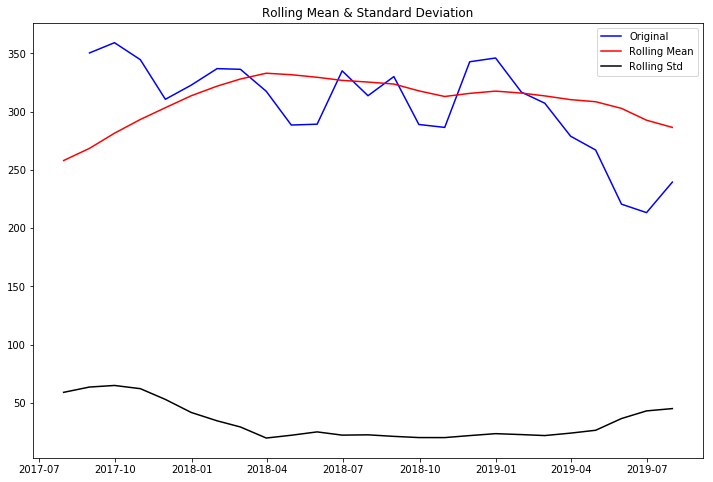

Results of Dickey-Fuller Test:
Test Statistic                 -1.672316
p-value                         0.445429
#Lags Used                      0.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [27]:
# Test the stationarity of the monthly open dataset

stationary_test(monthly_open.Open, 12)

Since the test statistic not less than any of the Critical Values we can not say that this timeseries, the monthly opening stock price is stationary.

In [ ]:
# Test the stationarity of the monthly open percent change dataset

stationary_test(monthly_open_percent_change.monthly_open_percent_change, 12)

Since the Test Statistic is less than all the Critical Values, we can say that this time series, the monthly opening percent change is stationary.

In [ ]:
# Autocorrelation Function ACF & PArtial Autocorrelation PACF

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(monthly_open_percent_change.monthly_open_percent_change.iloc[1:], lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(monthly_open_percent_change.monthly_open_percent_change.iloc[1:], lags=18, ax=ax2)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly_open_percent_change['monthly_open_percent_change'], trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
res = mod.fit()
print(res.summary())